In [1]:
from lab import *

In [2]:
dsh = pd.read_excel('data.xlsx', sheet_name=None, skiprows=2)
data = dsh['Лист 1']

In [3]:
freq = data['Частота, Гц']
volt = data['U, В']
cur = data['I, мА']
VOLTERR = 0.01
CURERR = 1
xi = [ufloat(v, VOLTERR) / (f * ufloat(c, CURERR)) for (v, f, c) in zip(volt, freq, cur)]

In [4]:
yudata = [1 / x**2 for x in xi]
xdata = freq**2
xdata = [x for x in xdata if x == x]
print(len(xdata))

11


In [5]:
ydata = [u.nominal_value for u in yudata]
ydata = [y for y in ydata if y == y]
print(len(ydata))
yerr = [u.std_dev for u in yudata]
yerr = [y for y in yerr if y == y]

11


/tmp/ipykernel_397295/2011622832.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  par, cov = curve_fit(f=l, xdata=xdata, ydata=ydata, sigma=yerr)


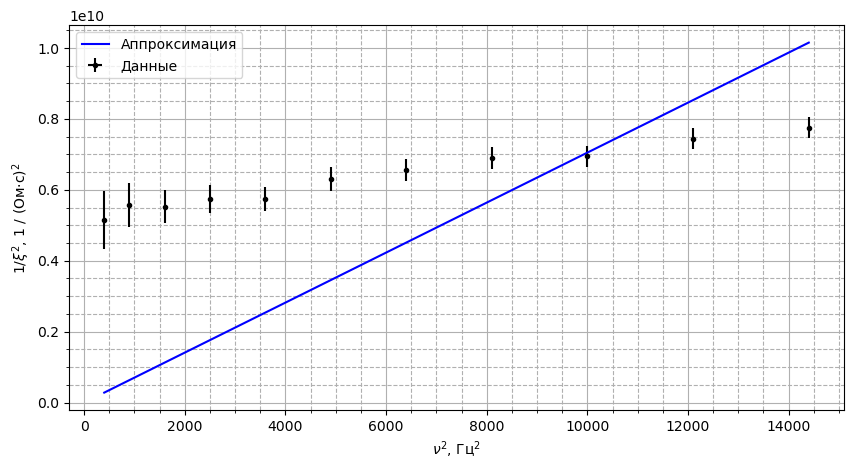

In [6]:
l = lambda x, a, b: a * x + b

plt.figure(figsize=FIGSIZE)
plt.errorbar(xdata, ydata, xerr=0, yerr=yerr, fmt='k.', label='Данные')

par, cov = curve_fit(f=l, xdata=xdata, ydata=ydata, sigma=yerr)
x = np.linspace(min(xdata), max(xdata), 1000)
plt.plot(x, l(x, *par), color='blue', label='Аппроксимация')
plt_singleton(title='', xlabel=r'$\nu^2$, Гц$^2$', ylabel=r'$1 / \xi^2$, 1 / (Ом$\cdot$с)$^2$')
plt.savefig('graph1.pdf')